In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('workplace_veryday_sexism_data_1_78.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   770 non-null    int64 
 1   post_id      770 non-null    object
 2   tags         770 non-null    object
 3   title        769 non-null    object
 4   date         770 non-null    object
 5   description  770 non-null    object
dtypes: int64(1), object(5)
memory usage: 36.2+ KB


Summary: The CSV file contained 770 entries of sexual harassment stories (from 21 Sep 2019 to 21 Sep 2022) that contained 'workplace' tag.

In [4]:
df.head()

,Unnamed: 0,post_id,tags,title,date,description
0,0,post-199274,"['university', 'workplace']",Kayte,21st September 2022,"Hello Laura, Thank you so much for creating a ..."
1,1,post-199279,"['cuerpo', 'workplace']",María,21st September 2022,El director de la Biblioteca donde trabajo men...
2,2,post-199285,"['conferences', 'engineering', 'webinars', 'wo...",A disappointed professional engineer,21st September 2022,"Since lockdowns began over a year ago, I have ..."
3,3,post-199299,['workplace'],Joy,21st September 2022,I work in a library and seeing what passes for...
4,4,post-199308,['workplace'],Lori,21st September 2022,Nothing quite like the review of being “hard t...


In [3]:
# drop the title row as this matched the entries' person name in the submission query
df = df.drop('title', axis=1)
df.head()

,Unnamed: 0,post_id,tags,date,description
0,0,post-199274,"['university', 'workplace']",21st September 2022,"Hello Laura, Thank you so much for creating a ..."
1,1,post-199279,"['cuerpo', 'workplace']",21st September 2022,El director de la Biblioteca donde trabajo men...
2,2,post-199285,"['conferences', 'engineering', 'webinars', 'wo...",21st September 2022,"Since lockdowns began over a year ago, I have ..."
3,3,post-199299,['workplace'],21st September 2022,I work in a library and seeing what passes for...
4,4,post-199308,['workplace'],21st September 2022,Nothing quite like the review of being “hard t...


In [4]:
# convert date stamp to month and year
df['DATETIME'] = pd.to_datetime(df['date'])
df['month'] = df['DATETIME'].dt.month
df['year'] = df['DATETIME'].dt.year
df.tail()

df.drop(['date','Unnamed: 0'], axis=1, inplace=True)
df.head()

,post_id,tags,description,DATETIME,month,year
0,post-199274,"['university', 'workplace']","Hello Laura, Thank you so much for creating a ...",2022-09-21,9,2022
1,post-199279,"['cuerpo', 'workplace']",El director de la Biblioteca donde trabajo men...,2022-09-21,9,2022
2,post-199285,"['conferences', 'engineering', 'webinars', 'wo...","Since lockdowns began over a year ago, I have ...",2022-09-21,9,2022
3,post-199299,['workplace'],I work in a library and seeing what passes for...,2022-09-21,9,2022
4,post-199308,['workplace'],Nothing quite like the review of being “hard t...,2022-09-21,9,2022


# Exploratory Data Analysis

The plot below shows the top 10 tags associated with the 'workplace' tag of the sexual harassment entries that were submitted from Sep 2019 to Sep 2022.

Text(0, 0.5, 'Tags')

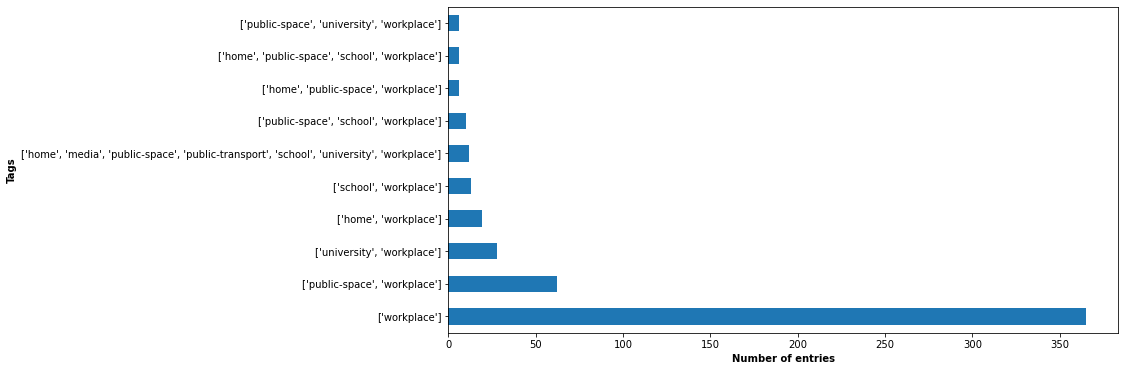

In [7]:
plt.figure()
df['tags'].value_counts()[:10].plot(kind='barh', figsize=(12,6))
plt.xlabel('Number of entries', weight='bold')
plt.ylabel('Tags', weight='bold')

The plot below shows the distribution of 'workplace' entries submitted from Sep 2019 to Sep 2022 (no submissions from sept 2019-feb 2020). There are no noticeable trends.

Text(0, 0.5, '(year, month)')

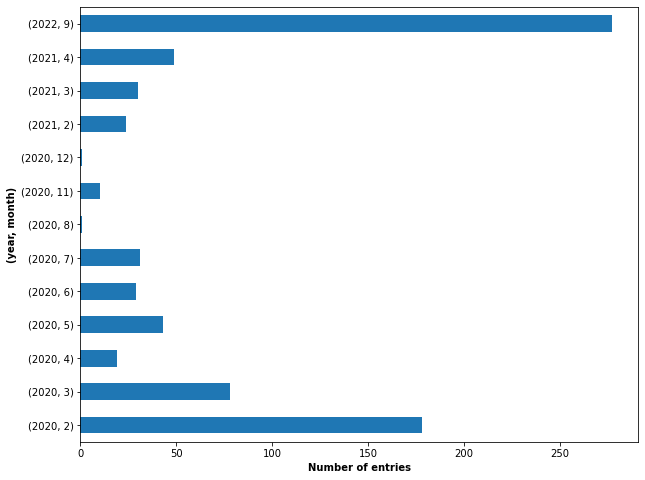

In [8]:
#df.groupby([df['month'], df['year']])['description'].sort_values(['month','year'])
#df.sort_values(['month', 'year'])
plt.figure(figsize=(10,8))
df.groupby([df['year'], df['month']])['description'].count().plot(kind='barh')
plt.xlabel('Number of entries', weight='bold')
plt.ylabel('(year, month)', weight='bold')


# Exploratory NLP

In [9]:
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
import re

### Let's preprocess and clean the text data first

In [10]:
# strip puncutation
df['ProcessedText'] = df['description'].map(lambda x: re.sub('[,\.!?]', '', x))
df.head()

# convert all to lower case
df['ProcessedText'] = df['ProcessedText'].map(lambda x: x.lower())
df.head()


,post_id,tags,description,DATETIME,month,year,ProcessedText
0,post-199274,"['university', 'workplace']","Hello Laura, Thank you so much for creating a ...",2022-09-21,9,2022,hello laura thank you so much for creating a s...
1,post-199279,"['cuerpo', 'workplace']",El director de la Biblioteca donde trabajo men...,2022-09-21,9,2022,el director de la biblioteca donde trabajo men...
2,post-199285,"['conferences', 'engineering', 'webinars', 'wo...","Since lockdowns began over a year ago, I have ...",2022-09-21,9,2022,since lockdowns began over a year ago i have a...
3,post-199299,['workplace'],I work in a library and seeing what passes for...,2022-09-21,9,2022,i work in a library and seeing what passes for...
4,post-199308,['workplace'],Nothing quite like the review of being “hard t...,2022-09-21,9,2022,nothing quite like the review of being “hard t...


Let's create a word cloud of all entries from Sep 2019 to Sep 2022.
(be sure to install wordcloud first using `pip install wordcloud` or `conda install -c conda-forge wordcloud`)

(-0.5, 399.5, 199.5, -0.5)

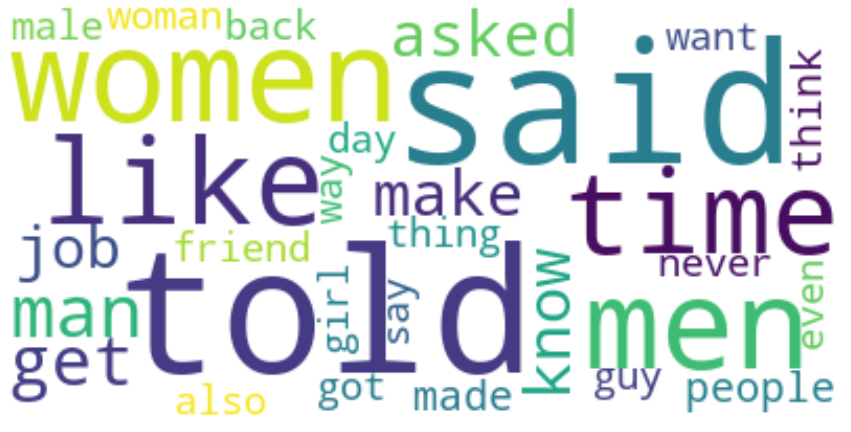

In [73]:
alltext = ' '.join(df['ProcessedText'])
excludeWords = ['work', \
                'would', \
                'could', \
                'one',  \
                ]
newText = alltext
for word in excludeWords:
    newText = newText.replace(word, '')

stopwordsSet = set(stopwords.words('english'))
wordcloud = WordCloud(stopwords=stopwordsSet, max_words=30, collocations=True, background_color='white',).generate(newText)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

The above wordcloud doesn't tell us much information as it doesn't show much of the context or topics. We shall do topic modelling to get better insights.

In [90]:
wordcloud.words_.keys()

dict_keys(['told', 'said', 'women', 'men', 'like', 'time', 'man', 'get', 'make', 'asked', 'know', 'job', 'people', 'think', 'made', 'even', 'friend', 'day', 'guy', 'thing', 'got', 'never', 'also', 'woman', 'want', 'back', 'say', 'way', 'girl', 'male'])

# Topic modelling using LDA

For LDA, we'll use gensim. First install using `pip install gensim` or `conda install -c conda-forge gensim`)

In [5]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.porter import PorterStemmer
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
import gensim.corpora as corpora
import nltk

/Users/franciscatan/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


### Preprocessing for LDA

In [6]:
# define functions for preprocessing

# break into tokens and deaccent, will convert to lowercase, ignoring tokens that are too short or too long
def tokenizeAndDeaccent(sentences):
    for sentence in sentences:
        yield(simple_preprocess(str(sentence),deacc=True))

# remove stop words
def removeStopWords(text, stopWords):
    return [[word for word in simple_preprocess(str(entry)) if word not in stopWords] for entry in text]

# lemmatization  
def lemmatize(text):
    import ast
    porter = PorterStemmer()
    return ast.literal_eval(porter.stem(str(text)))

# give most common words
def findFreqDist(text, k):
    fdist = nltk.FreqDist([item for sublist in text for item in sublist])
    topCommonWords = [i[0] for i in fdist.most_common(k)]
    return topCommonWords


In [7]:
# grab text
textData = df['description'].values.tolist()


In [39]:
# use standard stopwords from gensim
stopWords = list(STOPWORDS)

# filter off more common words
k=150
# fdist = nltk.FreqDist(str(textData).split())
# topCommonWords = [i[0] for i in fdist.most_common(k)]

topCommonWords = findFreqDist([i.split(' ') for i in textData],k)

stopWords.extend(topCommonWords)


In [40]:
# clean the text

tokens = tokenizeAndDeaccent(textData)

tokenList = list(tokens)

In [41]:
# remove stop words
tokenNoStopWords = removeStopWords(tokenList, stopWords)  


In [42]:
# perform lemmatization
tokenNoStopWordsStemed = lemmatize(tokenNoStopWords)
# nltk.download('wordnet')
#lemmaObj = nltk.wordnet.WordNetLemmatizer()
#tokenNoStopWordsStemed = lemmaObj.lemmatize(tokenNoStopWords)
# tokenNoStopWordsStemed = nltk.wordnet.WordNetLemmatizer

In [43]:
# check common words again, second pass
commonWordsSecondPass = findFreqDist(tokenNoStopWordsStemed,10)
commonWordsSecondPass

['ve',
 'old',
 'office',
 'colleagues',
 'happened',
 'good',
 'friend',
 'going',
 'friends',
 'year']

In [44]:
# remove common words again
cleanTextPassed = str([item for item in tokenNoStopWordsStemed if item not in commonWordsSecondPass])

In [46]:
# further filtering of common words
newtokens = []
for tok in tokenNoStopWordsStemed:
   newtokens.append(list(filter(lambda x: x not in commonWordsSecondPass, tok)))
newtokens

newtokens
findFreqDist(newtokens,6)

['away', 'school', 'home', 'sexism', 'came', 'life']

In [47]:
# build corpus
# cleanTokenList = [tokenNoStopWordsStemed.split()]
# cleanTokenList = [str(tokenNoStopWords).split()]
cleanTokenList = newtokens

wordID = corpora.Dictionary(cleanTokenList)
#list(corpusDict)

corpus = [wordID.doc2bow(tokenList) for tokenList in cleanTokenList]


### LDA modelling

In [52]:
numTopics = 4

#build LDA model
lda = gensim.models.LdaModel(corpus=corpus, id2word=wordID,num_topics=numTopics, \
                             passes=4, alpha=[0.01]*numTopics, eta=[0.01]*len(wordID.keys()))

# 
# print keywords per topic
for i,topic in lda.show_topics(formatted=True, num_topics=numTopics, num_words=10):
    print(str(i)+": "+ topic)
    print()


0: 0.005*"company" + 0.004*"sexism" + 0.003*"sexual" + 0.003*"later" + 0.003*"senior" + 0.003*"meeting" + 0.003*"look" + 0.003*"life" + 0.003*"left" + 0.003*"worked"

1: 0.005*"uncomfortable" + 0.005*"team" + 0.004*"away" + 0.004*"look" + 0.004*"boys" + 0.004*"wasn" + 0.003*"worked" + 0.003*"knew" + 0.003*"left" + 0.003*"sexism"

2: 0.004*"saying" + 0.004*"new" + 0.003*"person" + 0.003*"guys" + 0.003*"right" + 0.003*"girls" + 0.003*"help" + 0.003*"husband" + 0.003*"comments" + 0.003*"school"

3: 0.004*"came" + 0.004*"school" + 0.004*"tried" + 0.004*"home" + 0.004*"tell" + 0.003*"sexual" + 0.003*"life" + 0.003*"older" + 0.003*"away" + 0.003*"hand"



In [56]:
print('Perplexity:', lda.log_perplexity(corpus))
coherence_score_lda = gensim.models.CoherenceModel(model=lda, texts=cleanTokenList, dictionary=wordID, coherence='c_v')  #conda install -c conda-forge python-levenshtein
coherence_score = coherence_score_lda.get_coherence()
print('\nCoherence Score:', coherence_score)

Perplexity: -9.306029327445906


/Users/franciscatan/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/franciscatan/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/franciscatan/opt/anaconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/p


Coherence Score: 0.24706422753046006


To visualise LDA, we'll use pyldavis. First install using `pip install pyldavis` or `conda install -c conda-forge pyldavis`)

In [50]:
# visualize LDA
import pyLDAvis
import pyLDAvis.gensim_models as ldavis
from jupyterthemes import jtplot  #conda install -c conda-forge jupyterthemes

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [53]:
vis = ldavis.prepare(topic_model=lda, corpus=corpus, dictionary=wordID)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/Users/franciscatan/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
